Don't forget; there's also [jpivarski-talks/2023-05-09-chep23-analysis-of-physicists/analysis/hep-vs-other.ipynb](https://github.com/jpivarski-talks/2023-05-09-chep23-analysis-of-physicists/blob/main/analysis/hep-vs-other.ipynb).

In [1]:
import json
import glob
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
types_df = pd.read_csv("explicit-dependents.csv", header=0, names=["repo", "category"])
types_df.set_index("repo", inplace=True)
types_df

,category
repo,
jlazar17/IceCube_Masterclass_MoonShadow,ASTRO
mkotyushev/graphnet,ASTRO
pband1256/GNN_preprocessing,ASTRO
pone-software/ananke,ASTRO
pone-software/apollo,ASTRO
...,...
WilliamKorcari/fgsim,HEP
wouterwln/NeuralFactorTrees,HEP
yimuchen/SiPMCalibControl,HEP


In [3]:
fork_df = pd.DataFrame(
    [
        ("/".join(x.split("/")[-2:]), json.load(open(x)).get("fork", False))
        for x in glob.glob(
            "/home/jpivarski/storage/data/dependent-repos-of-awkward/__REST_INFO/*/*"
        )
    ],
    columns=["repo", "is_fork"],
)
fork_df.set_index("repo", inplace=True)
fork_df

,is_fork
repo,
alexey-luchinsky/rrF,False
JamesOConnor/stackstac,True
brownd1978/KKTrain_1,False
j8sr0230/codelink,False
jpivarski-talks/2022-09-12-pyhep22-awkward-combinatorics,False
...,...
Cloud-Drift/clouddrift,False
jdmulligan/JETSCAPE-analysis,False
MarcoValente/hh4b_intro,False


In [4]:
files_df = pd.read_csv("files-in-dependents.csv", header=0, names=["file", "date"])

In [5]:
files_df["date"] = pd.to_datetime([datetime.strptime(x, "%a %b %d %H:%M:%S %Y %z").timestamp() for x in files_df["date"].values], unit="s")

In [6]:
files_df["repo"] = files_df["file"].map(lambda x: "/".join(x.split("/")[:2]))

In [7]:
files_df["file"] = files_df["file"].map(lambda x: "/".join(x.split("/")[2:]))

In [8]:
files_df.set_index(["repo", "file"], inplace=True)

In [9]:
files_df

date
repo                  file                                                              
451488975/Jet_tagging tf-keras/convert_dataset.ipynb                 2020-10-15 05:06:55
acts-project/acts     Examples/Scripts/generic_plotter.py            2022-09-06 12:19:13
                      Examples/Python/tests/helpers/hash_root.py     2021-10-26 10:51:01
adasco2022/act        Examples/Python/tests/helpers/hash_root.py     2021-10-26 10:51:01
adminyjqr/ssl-hep     transformer.py                                 2021-04-23 20:09:09
...                                                                                  ...
Zstone19/TempMap      Examples/RealData_Tutorial.ipynb               2022-09-30 01:08:10
                      Examples/ArbitrarilySampledData_Tutorial.ipynb 2022-10-11 01:31:00
                      Examples/SimData_Tutorial.ipynb                2022-09-30 01:08:10
                      src/temp_map/algorithm.py                      2023-04-17 01:17:20
                      src/temp_map/run.py                            2023-04-17 01:17:20

[2163 rows x 1 columns]

In [10]:
df = files_df.join(types_df).join(fork_df)
df["is_HEP"] = (df["category"] == "HEP")
df

date  \
repo                  file                                                                 
451488975/Jet_tagging tf-keras/convert_dataset.ipynb                 2020-10-15 05:06:55   
acts-project/acts     Examples/Scripts/generic_plotter.py            2022-09-06 12:19:13   
                      Examples/Python/tests/helpers/hash_root.py     2021-10-26 10:51:01   
adasco2022/act        Examples/Python/tests/helpers/hash_root.py     2021-10-26 10:51:01   
adminyjqr/ssl-hep     transformer.py                                 2021-04-23 20:09:09   
...                                                                                  ...   
Zstone19/TempMap      Examples/RealData_Tutorial.ipynb               2022-09-30 01:08:10   
                      Examples/ArbitrarilySampledData_Tutorial.ipynb 2022-10-11 01:31:00   
                      Examples/SimData_Tutorial.ipynb                2022-09-30 01:08:10   
                      src/temp_map/algorithm.py                      2023-04-17 01:17:20   
                      src/temp_map/run.py                            2023-04-17 01:17:20   

                                                                     category  \
repo                  file                                                      
451488975/Jet_tagging tf-keras/convert_dataset.ipynb                      HEP   
acts-project/acts     Examples/Scripts/generic_plotter.py                 HEP   
                      Examples/Python/tests/helpers/hash_root.py          HEP   
adasco2022/act        Examples/Python/tests/helpers/hash_root.py          HEP   
adminyjqr/ssl-hep     transformer.py                                      HEP   
...                                                                       ...   
Zstone19/TempMap      Examples/RealData_Tutorial.ipynb                  ASTRO   
                      Examples/ArbitrarilySampledData_Tutorial.ipynb    ASTRO   
                      Examples/SimData_Tutorial.ipynb                   ASTRO   
                      src/temp_map/algorithm.py                         ASTRO   
                      src/temp_map/run.py                               ASTRO   

                                                                      is_fork  \
repo                  file                                                      
451488975/Jet_tagging tf-keras/convert_dataset.ipynb                    False   
acts-project/acts     Examples/Scripts/generic_plotter.py               False   
                      Examples/Python/tests/helpers/hash_root.py        False   
adasco2022/act        Examples/Python/tests/helpers/hash_root.py        False   
adminyjqr/ssl-hep     transformer.py                                    False   
...                                                                       ...   
Zstone19/TempMap      Examples/RealData_Tutorial.ipynb                  False   
                      Examples/ArbitrarilySampledData_Tutorial.ipynb    False   
                      Examples/SimData_Tutorial.ipynb                   False   
                      src/temp_map/algorithm.py                         False   
                      src/temp_map/run.py                               False   

                                                                      is_HEP  
repo                  file                                                    
451488975/Jet_tagging tf-keras/convert_dataset.ipynb                    True  
acts-project/acts     Examples/Scripts/generic_plotter.py               True  
                      Examples/Python/tests/helpers/hash_root.py        True  
adasco2022/act        Examples/Python/tests/helpers/hash_root.py        True  
adminyjqr/ssl-hep     transformer.py                                    True  
...                                                                      ...  
Zstone19/TempMap      Examples/RealData_Tutorial.ipynb                 False  
                      Examples/ArbitrarilySampledData_Tutorial.ipynb

In [11]:
df2 = df.reset_index()
df2

,repo,file,date,category,is_fork,is_HEP
0,451488975/Jet_tagging,tf-keras/convert_dataset.ipynb,2020-10-15 05:06:55,HEP,False,True
1,acts-project/acts,Examples/Scripts/generic_plotter.py,2022-09-06 12:19:13,HEP,False,True
2,acts-project/acts,Examples/Python/tests/helpers/hash_root.py,2021-10-26 10:51:01,HEP,False,True
3,adasco2022/act,Examples/Python/tests/helpers/hash_root.py,2021-10-26 10:51:01,HEP,False,True
4,adminyjqr/ssl-hep,transformer.py,2021-04-23 20:09:09,HEP,False,True
...,...,...,...,...,...,...
2158,Zstone19/TempMap,Examples/RealData_Tutorial.ipynb,2022-09-30 01:08:10,ASTRO,False,False
2159,Zstone19/TempMap,Examples/ArbitrarilySampledData_Tutorial.ipynb,2022-10-11 01:31:00,ASTRO,False,False
2160,Zstone19/TempMap,Examples/SimData_Tutorial.ipynb,2022-09-30 01:08:10,ASTRO,False,False
2161,Zstone19/TempMap,src/temp_map/algorithm.py,2023-04-17 01:17:20,ASTRO,False,False


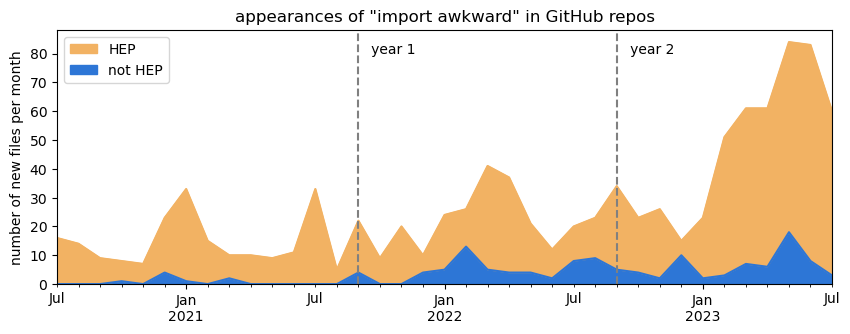

In [12]:
fig, ax = plt.subplots(figsize=(10, 3.3))

df2[~df2["is_fork"] & (df2["category"] != "AWK")].groupby(["date", "is_HEP"]).count()["is_fork"].unstack(level="is_HEP").fillna(0).resample("M").sum().plot.area(
    stacked=True, color=["#2d76d6", "#f2b263"], ax=ax
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], ["HEP", "not HEP"], loc="upper left");

ax.set_xlim("2020-07-01", "2023-07-01")
ax.set_xlabel("");

ax.set_ylim(0, ax.get_ylim()[1]);
ax.set_ylabel("number of new files per month");

ax.axvline("2021-09-01", color="gray", linestyle="--");
ax.axvline("2022-09-01", color="gray", linestyle="--");

ax.text("2021-09-01", 80, "   year 1");
ax.text("2022-09-01", 80, "   year 2");

ax.set_title("appearances of \"import awkward\" in GitHub repos");

fig.savefig("PLOTS/appearances-of-import-awkward.pdf");
fig.savefig("PLOTS/appearances-of-import-awkward.svg");

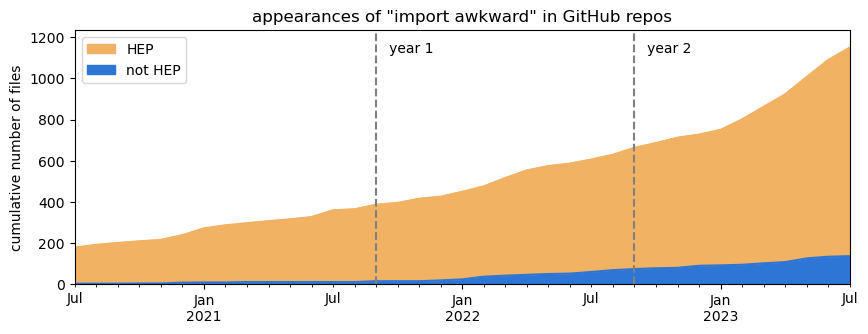

In [13]:
fig, ax = plt.subplots(figsize=(10, 3.3))

df3 = df2[~df2["is_fork"] & (df2["category"] != "AWK")].groupby(["date", "is_HEP"]).count()["is_fork"].unstack(level="is_HEP").fillna(0).resample("M").sum()

df3.cumsum().plot.area(
    stacked=True, color=["#2d76d6", "#f2b263"], ax=ax
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], ["HEP", "not HEP"], loc="upper left");

ax.set_xlim("2020-07-01", "2023-07-01")
ax.set_xlabel("");

ax.set_ylim(0, ax.get_ylim()[1]);
ax.set_ylabel("cumulative number of files");

ax.axvline("2021-09-01", color="gray", linestyle="--");
ax.axvline("2022-09-01", color="gray", linestyle="--");

ax.text("2021-09-01", 1125, "   year 1");
ax.text("2022-09-01", 1125, "   year 2");

ax.set_title("appearances of \"import awkward\" in GitHub repos");

fig.savefig("PLOTS/appearances-of-import-awkward-cumulative.pdf");
fig.savefig("PLOTS/appearances-of-import-awkward-cumulative.svg");